# Statistical Analysis in SAS

## The Not So Scary Overview

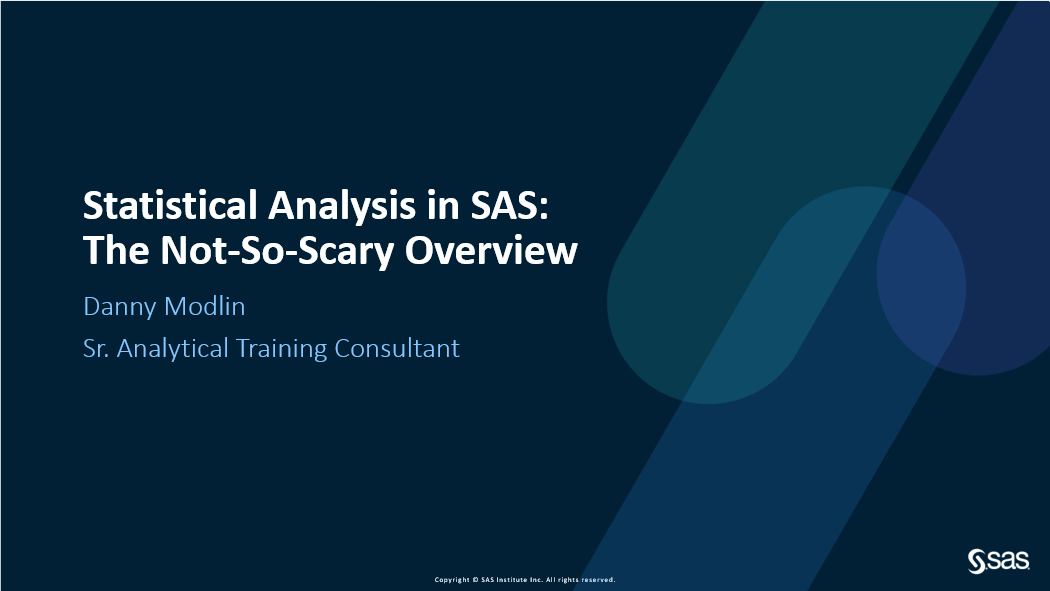

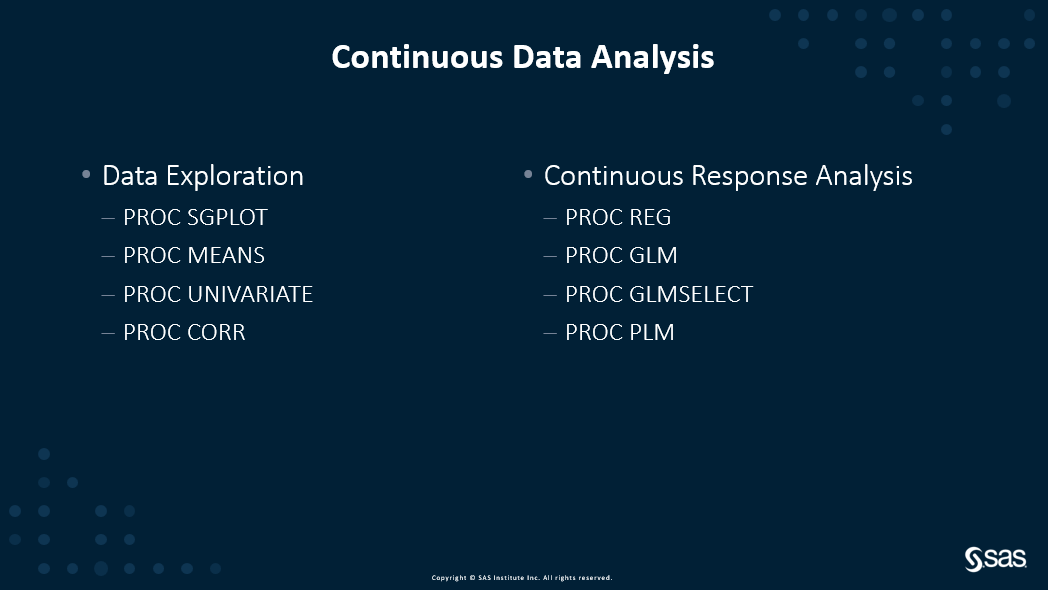

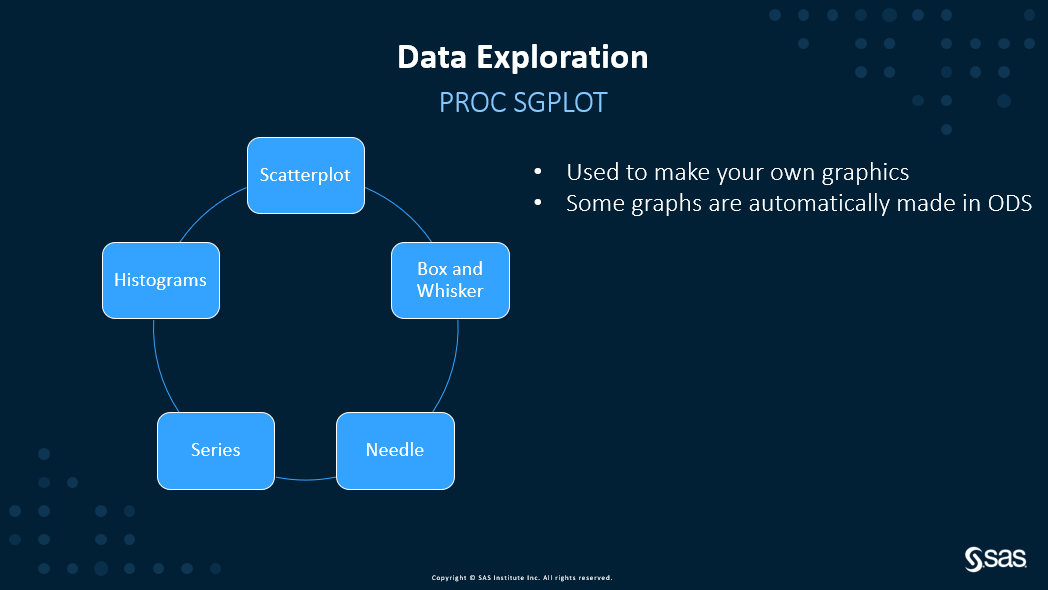

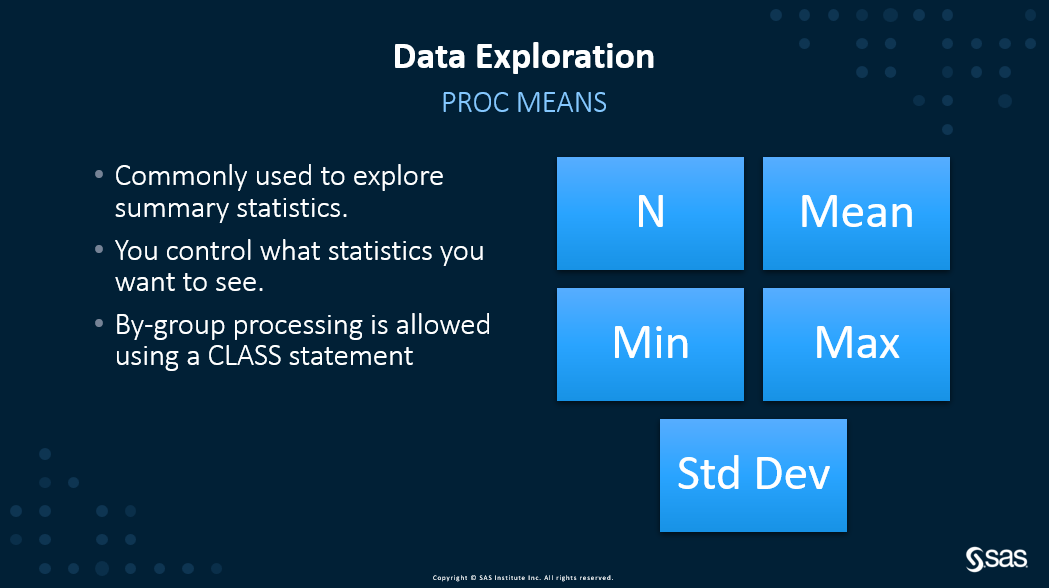

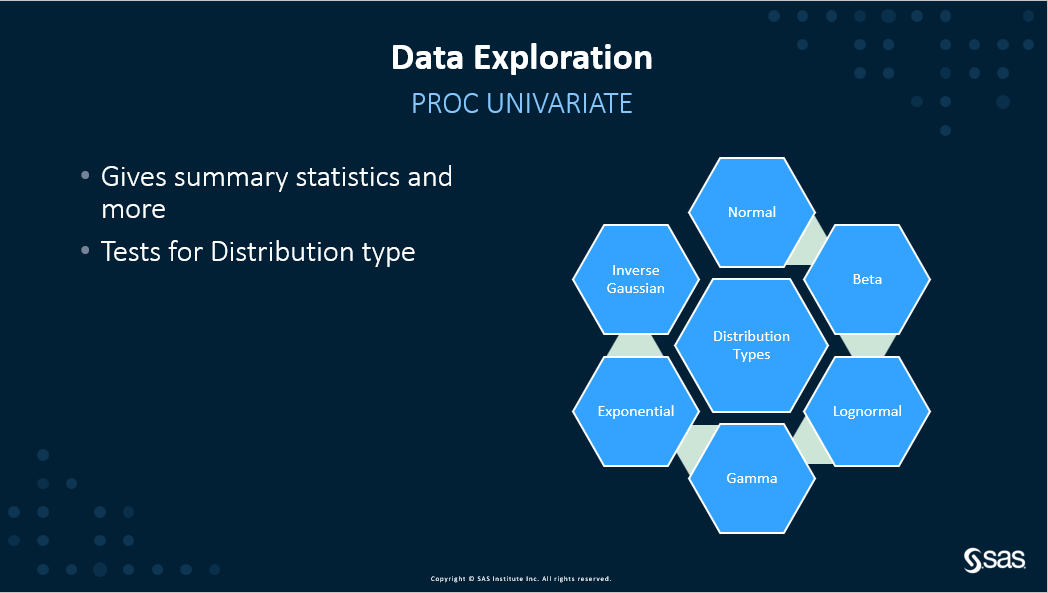

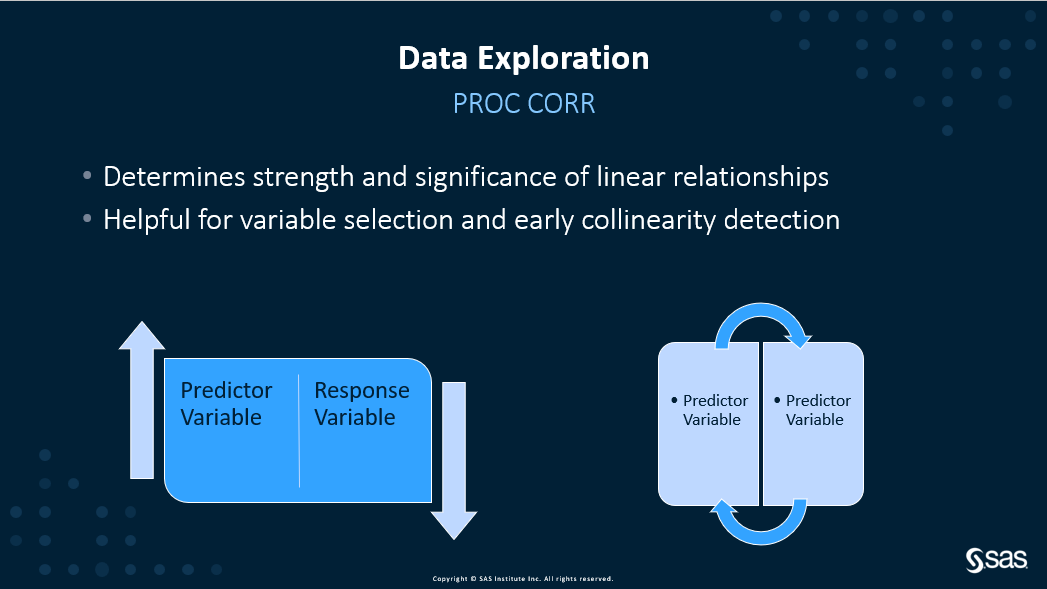

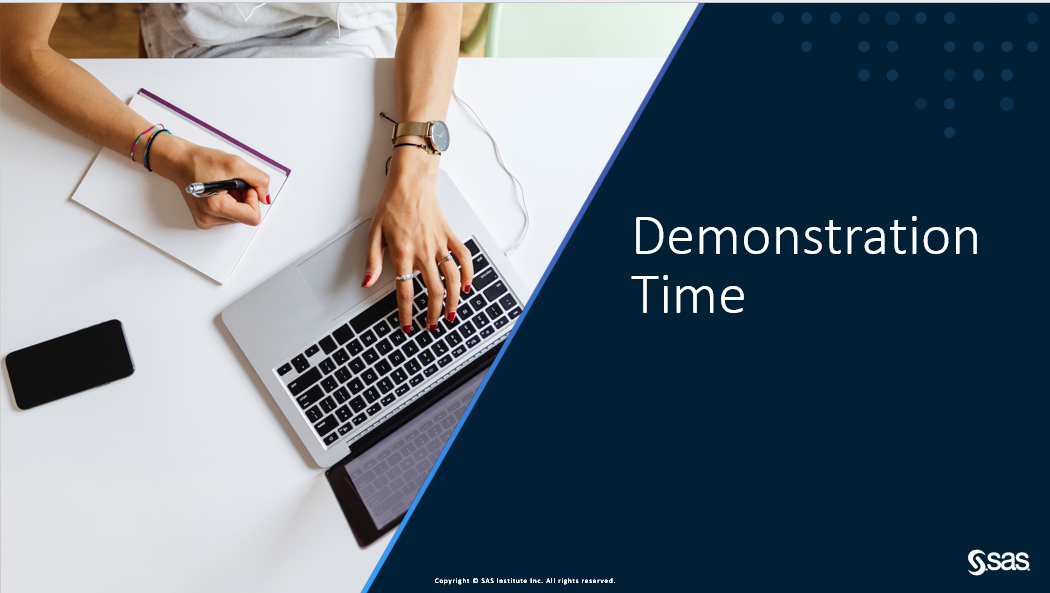

PROC SGPLOT: Making your own graphics


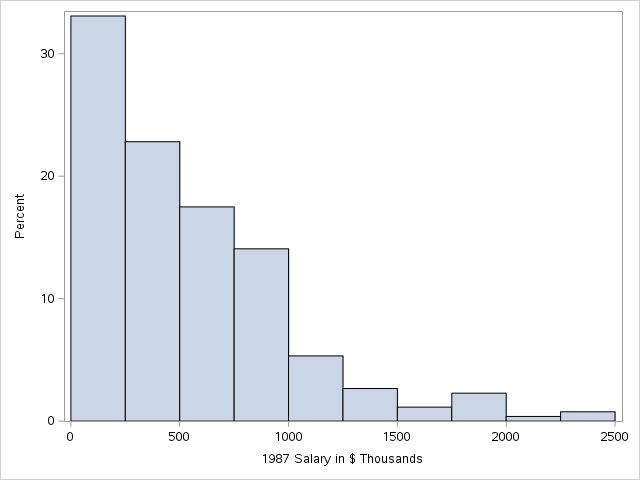

In [2]:
proc sgplot data=sashelp.baseball;
   histogram salary;
run;


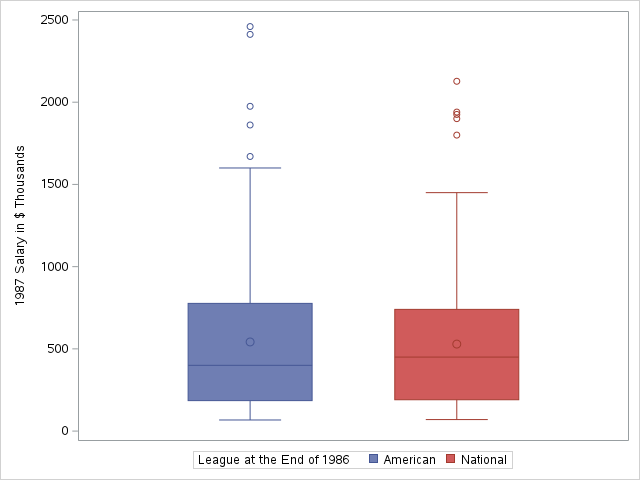

In [3]:
proc sgplot data=sashelp.baseball;
   vbox salary / group=league;
run;


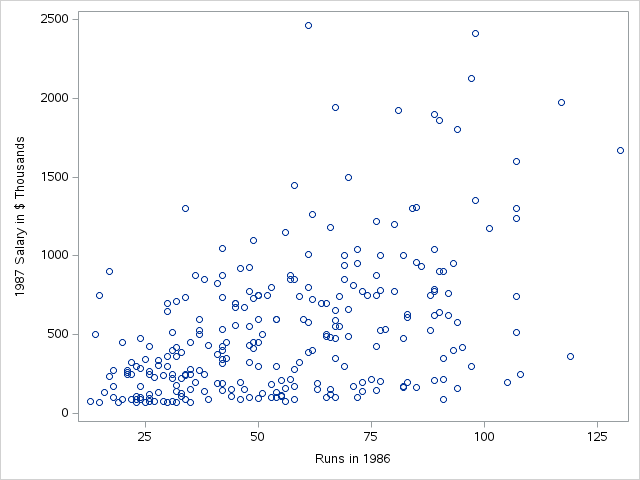

In [4]:
proc sgplot data=sashelp.baseball;
   scatter y=salary x=nRuns;
run;


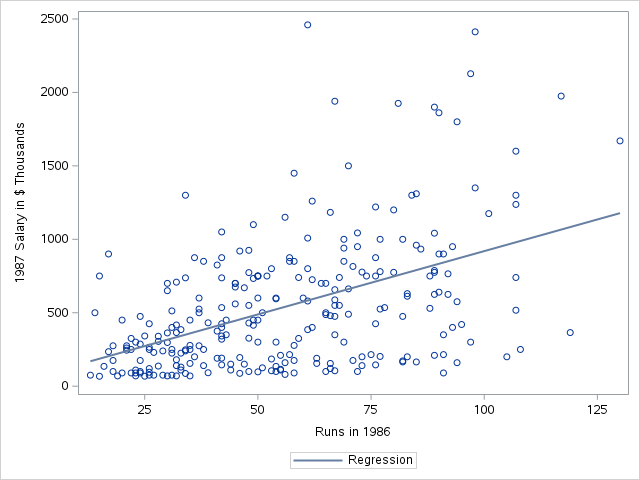

In [5]:
proc sgplot data=sashelp.baseball;
   reg y=salary x=nRuns;
run;

PROC MEANS: Summary statistics tables

In [6]:
proc means data=sashelp.baseball;
    var salary;
run;

In [7]:
proc means data=sashelp.baseball median var qrange;
    var salary;
run;

In [8]:
proc means data=sashelp.baseball median n mean std min max;
    var salary;
run;

In [9]:
proc means data=sashelp.baseball;
   class league;
   var salary nHits;
run;

PROC UNIVARIATE: Summary statistics with distribution questions


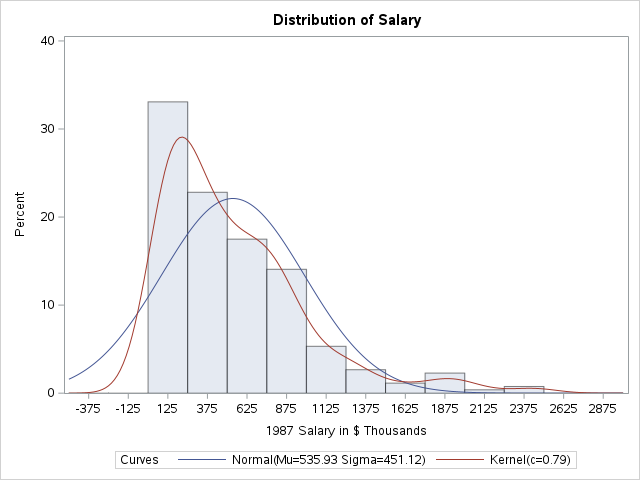

In [10]:
proc univariate data=sashelp.baseball;
   var salary;
   histogram salary / kernel normal;
run;


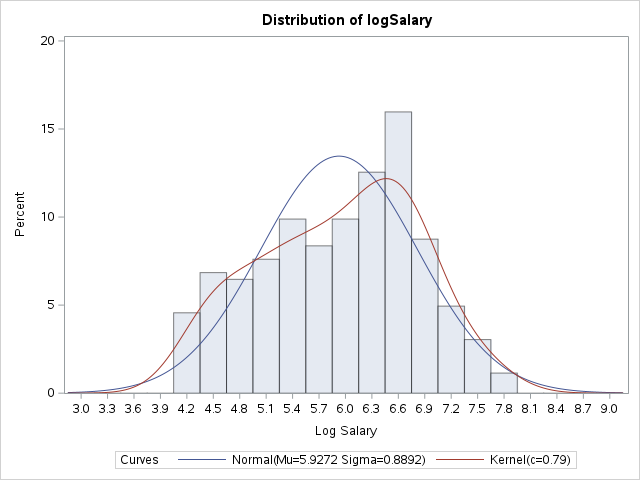

In [11]:
proc univariate data=sashelp.baseball;
   var logsalary;
   histogram logsalary / kernel normal;
run;

PROC CORR: relationships among variable for multiple uses


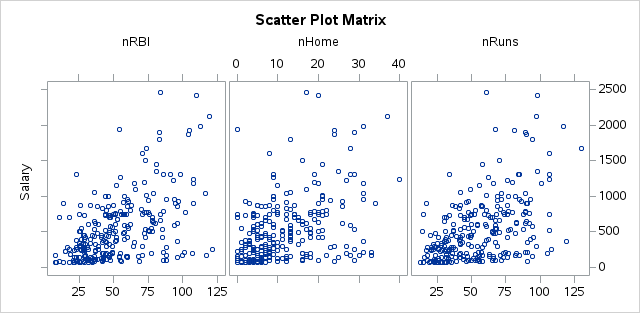

In [12]:
proc corr data=sashelp.baseball plots=matrix;
   var nRBI nHome nRuns;
   with salary;
run;


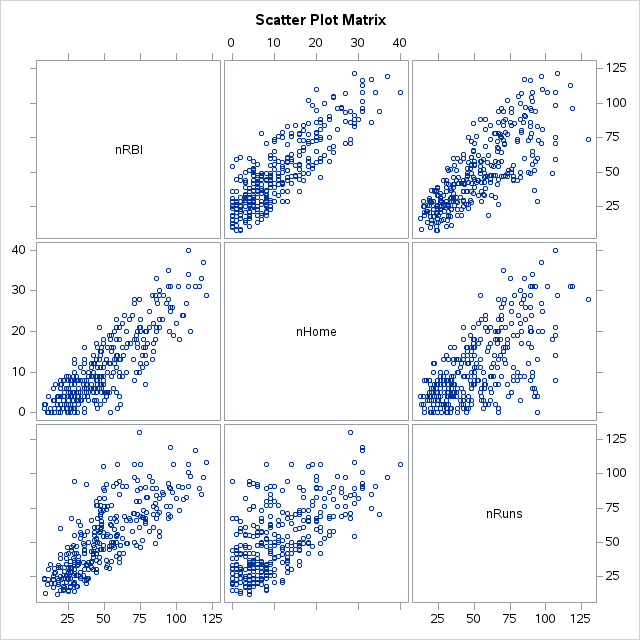

In [13]:
proc corr data=sashelp.baseball plots=matrix;
   var nRBI nHome nRuns;
run;

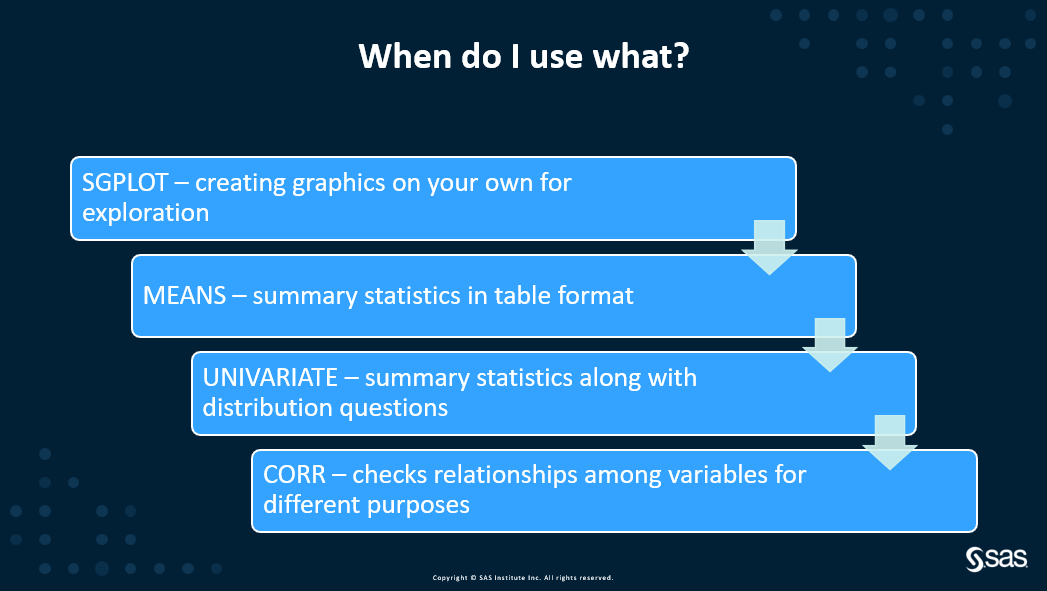

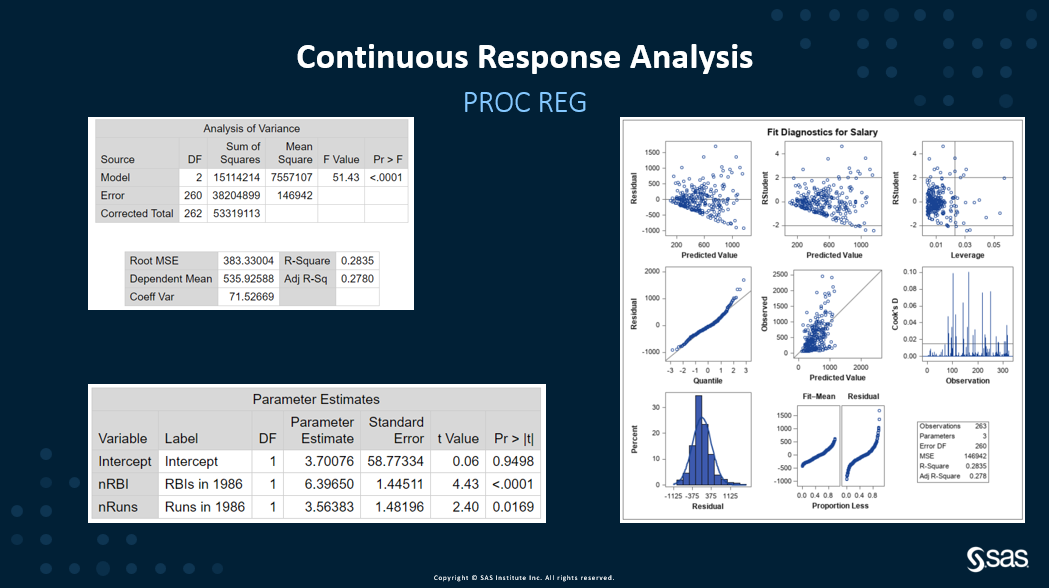

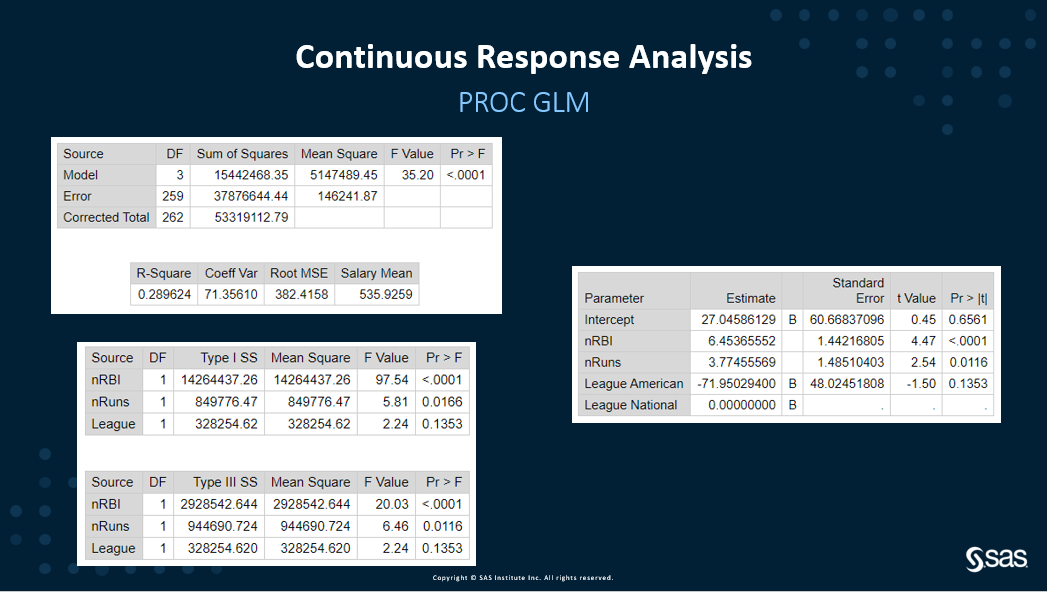

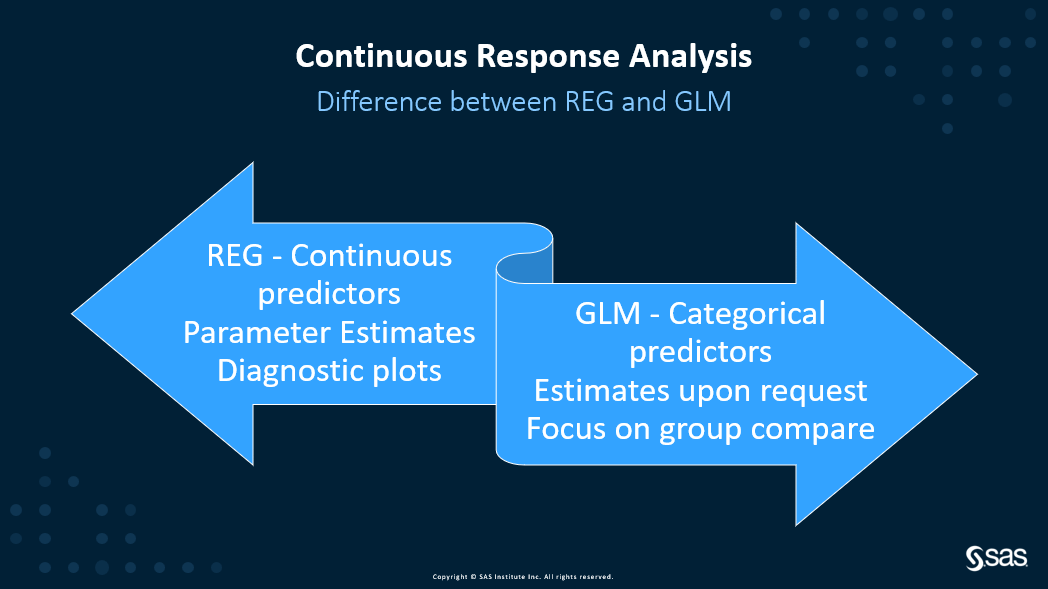

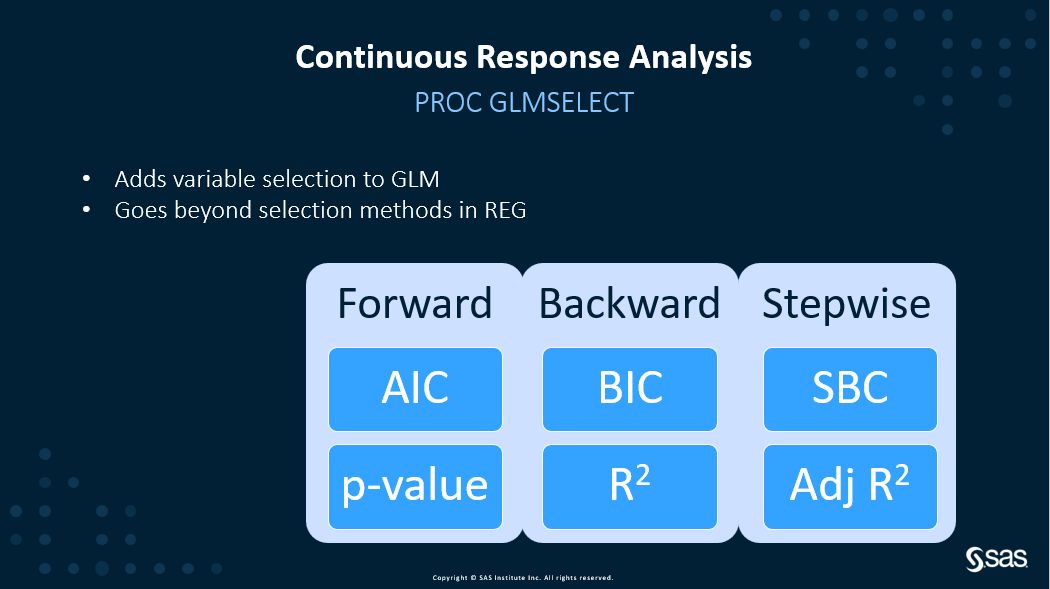

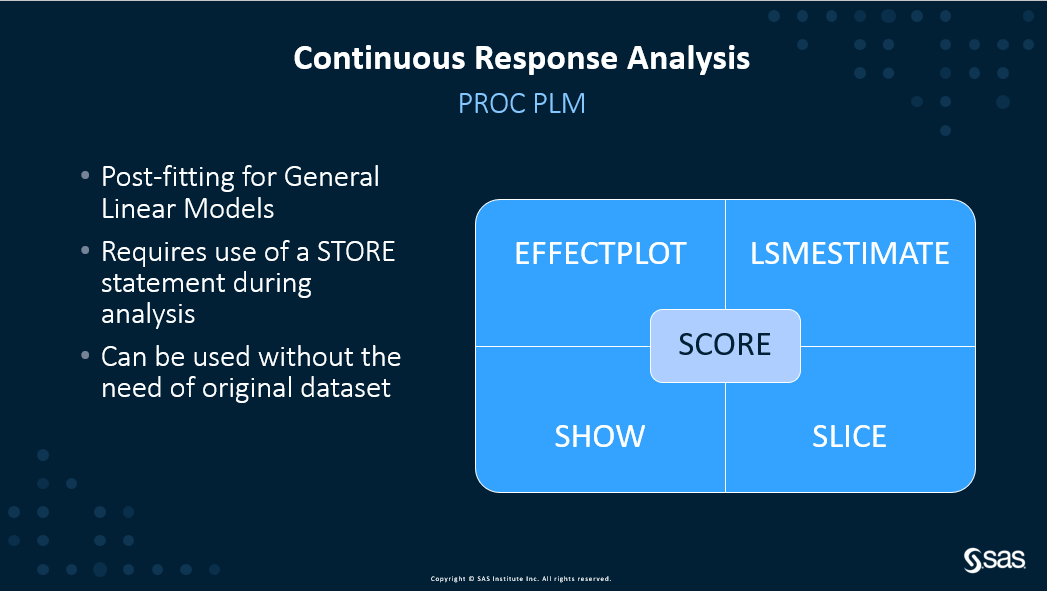

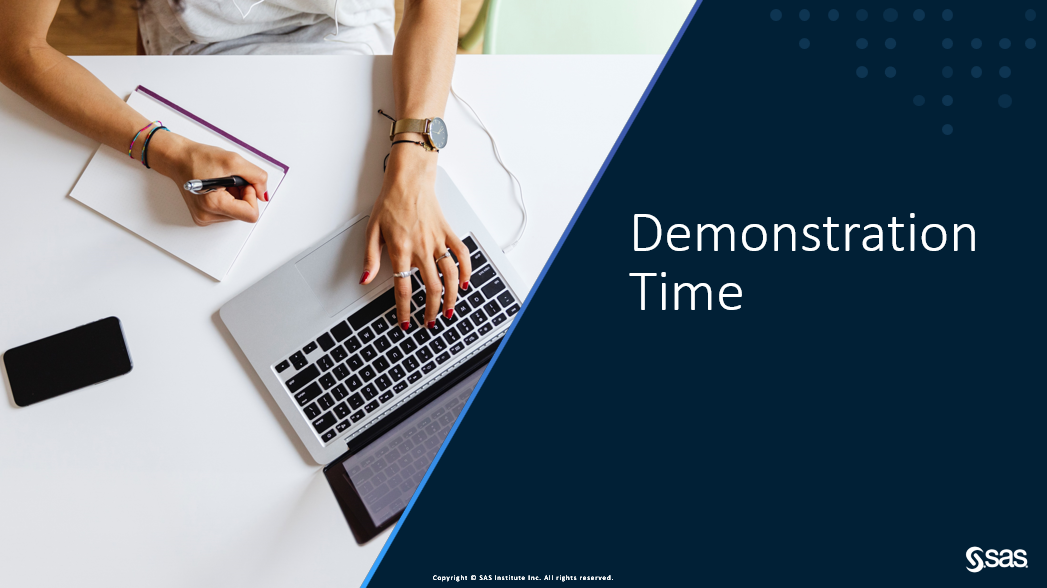

PROC REG: continuous predictors


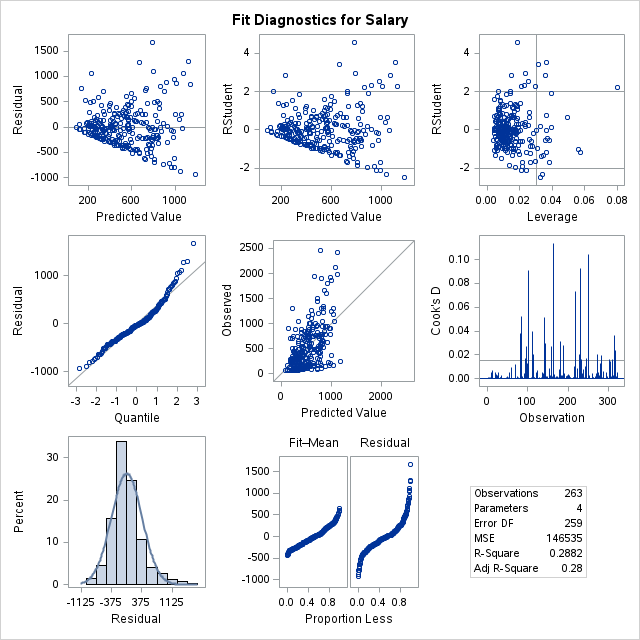
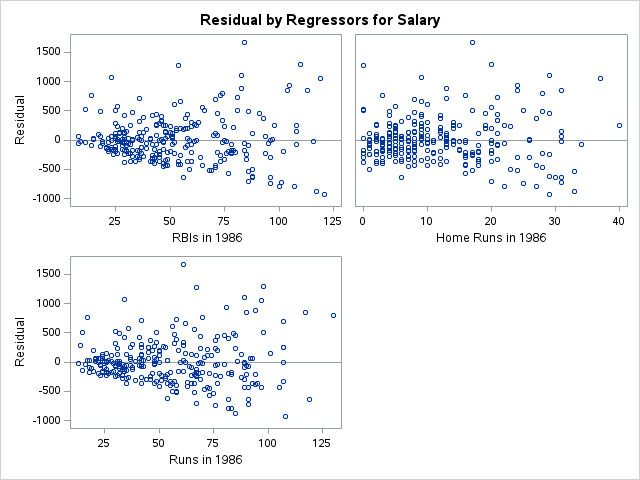

In [14]:
proc reg data=sashelp.baseball;
   model salary = nRBI nHome nRuns;
run;

PROC GLM: categorical predictors

In [15]:
proc glm data=sashelp.baseball;
   class league;
   model salary = nRBI nHome nRuns league;
run;

In [16]:
proc glm data=sashelp.baseball;
   class league;
   model salary = nRBI nHome nRuns league / solution;
run;

PROC GLMSELECT: GLM plus additional variable selection beyond REG

In [17]:
proc glmselect data=sashelp.baseball;
   class league;
   model salary = nRBI nHome nRuns league / selection=forward select=AIC;
run;

In [18]:
proc glmselect data=sashelp.baseball;
   class league;
   model salary = nRBI nHome nRuns league / selection=backward select=sl;
run;

Running PROC PLM after GLMSELECT: Slicing into the Interaction Term


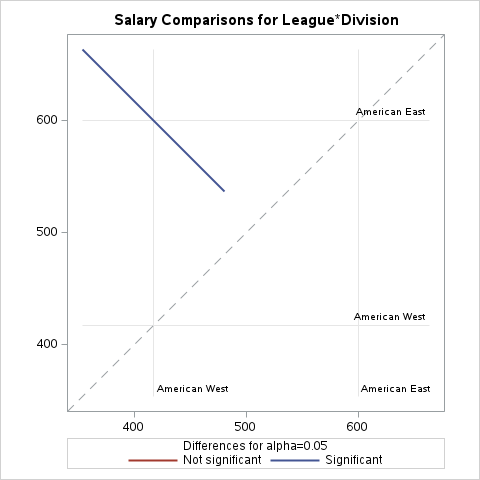
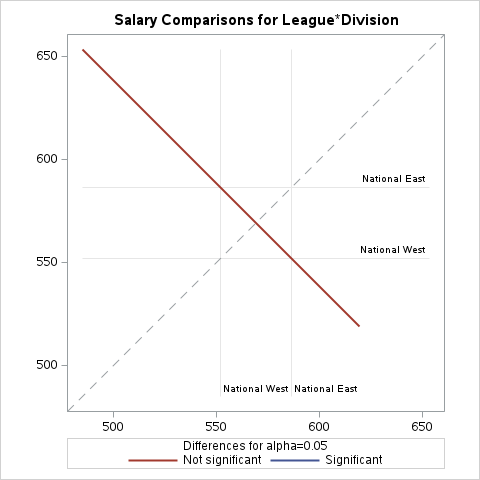

In [20]:
proc glmselect data=sashelp.baseball;
   class league division;
   model salary = nRBI nHome nRuns league|division / selection=none showpvalues;
   store out=baseballitem;
run;

proc plm restore=baseballitem plots=all;
   slice league*division / sliceby=league;
run;

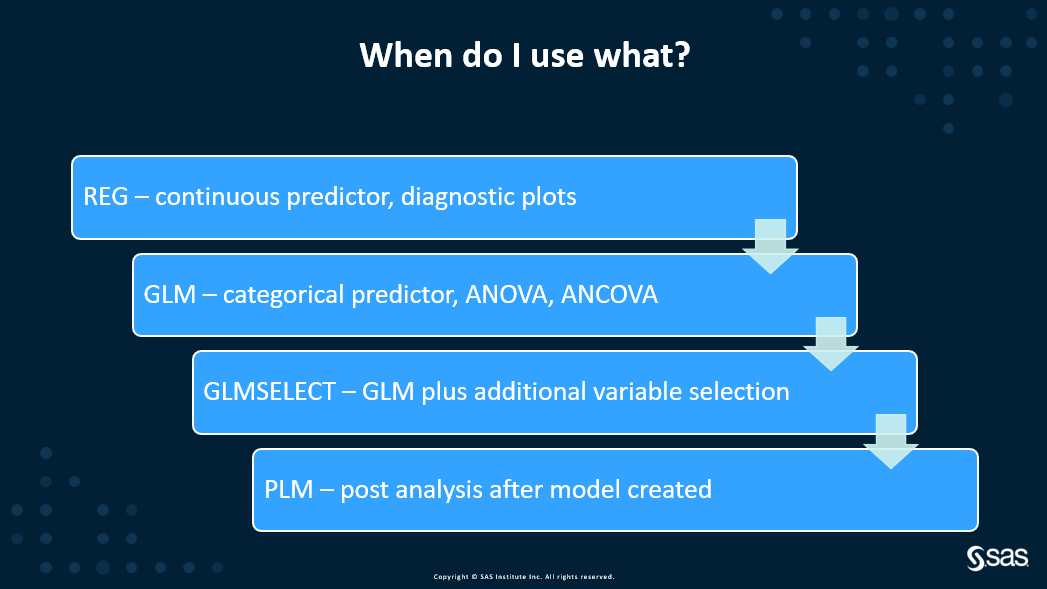

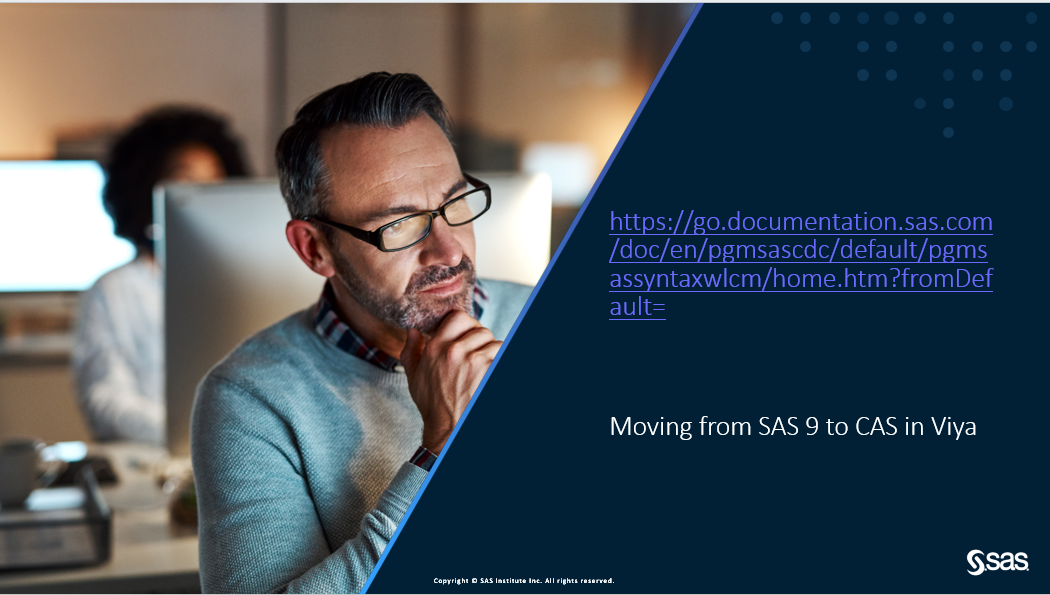

https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsassyntaxwlcm/home.htm?fromDefault=

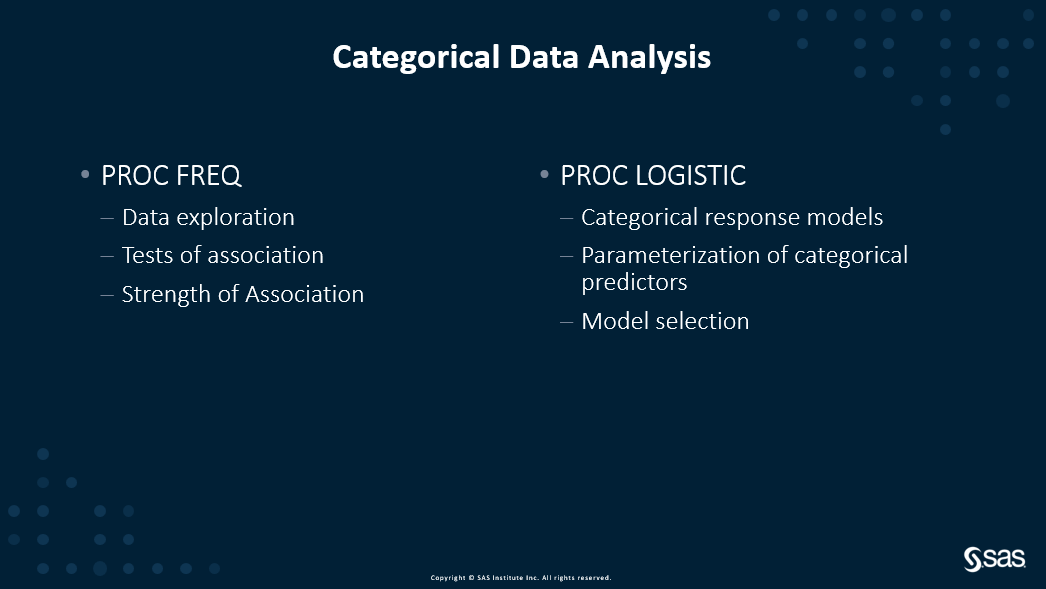

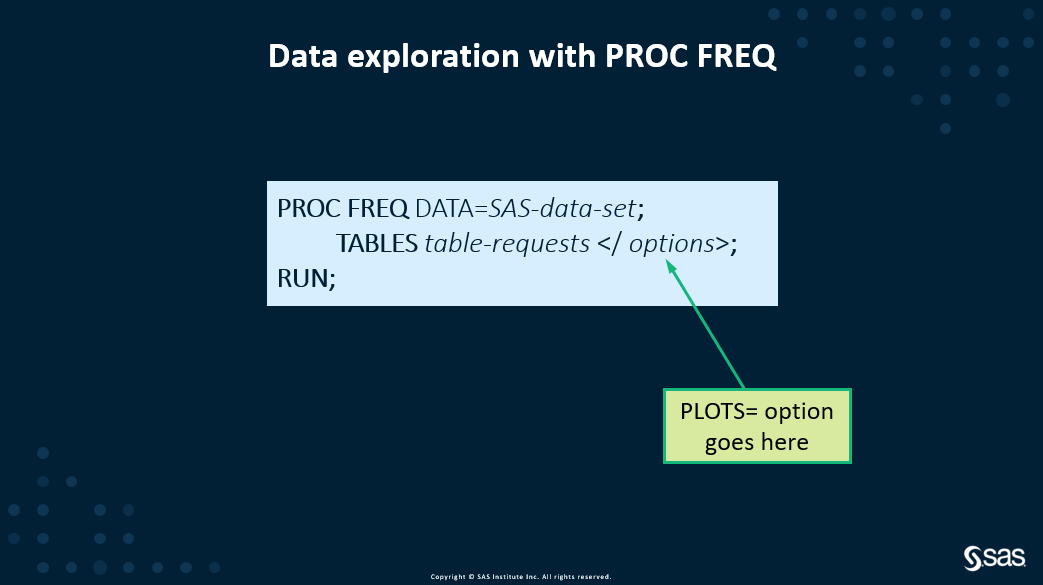

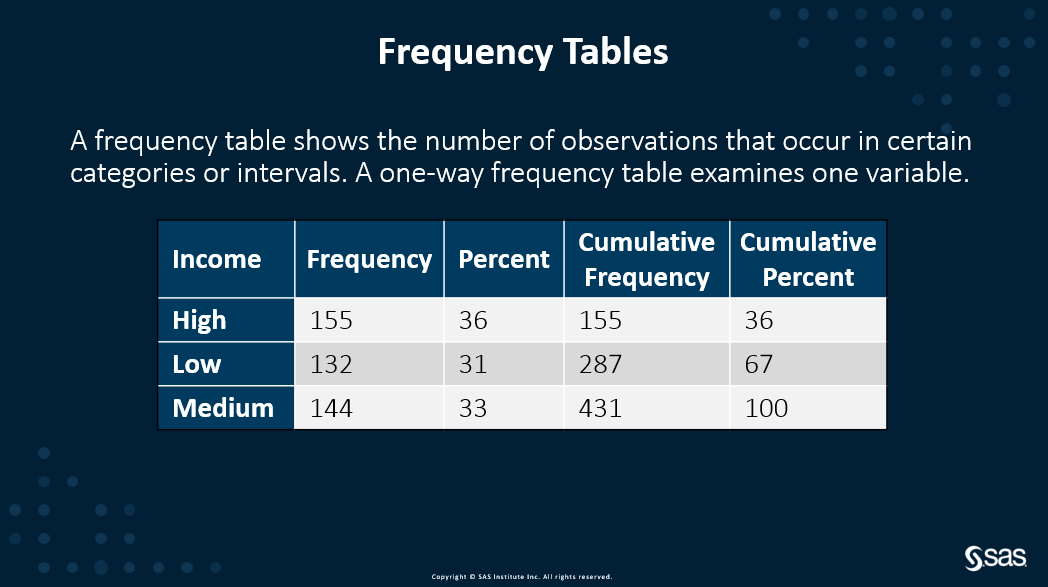

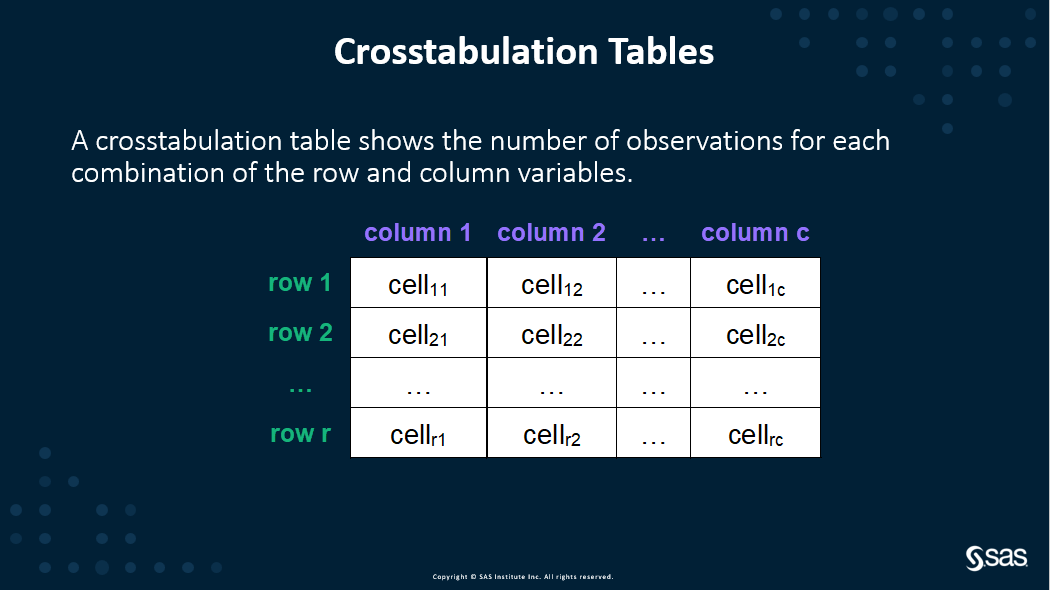

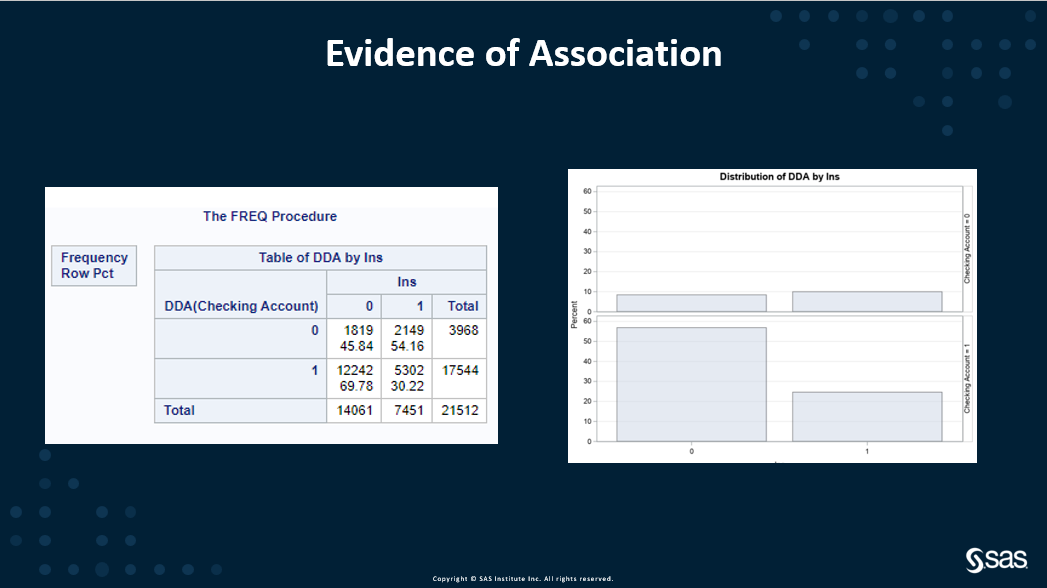

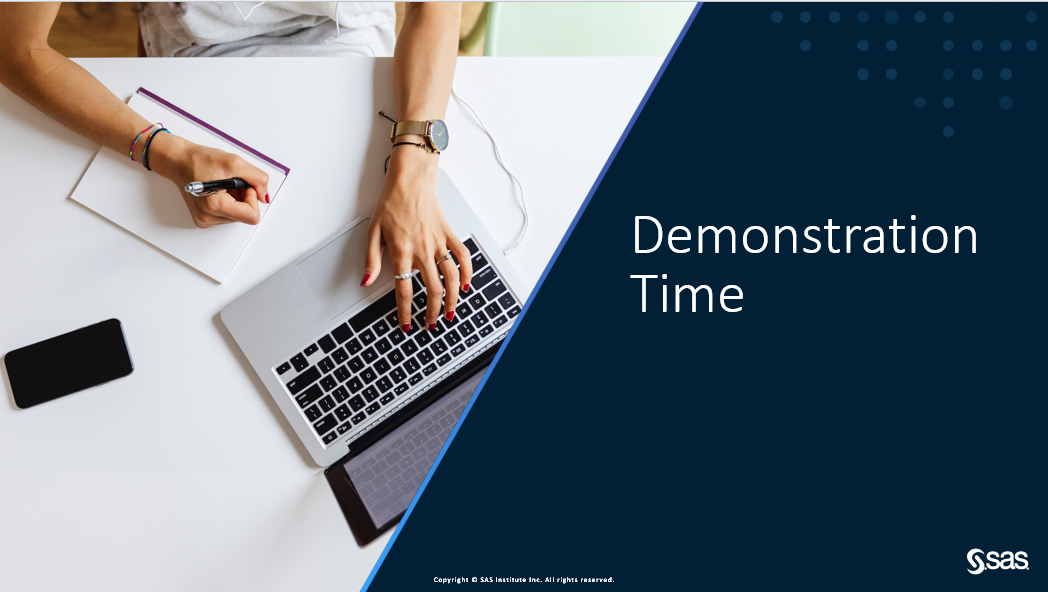

Running PROC FREQ to Explore Categorical Variables

In [2]:
proc freq data=sashelp.heart;
   table status BP_status Chol_status sex Weight_status;
run;



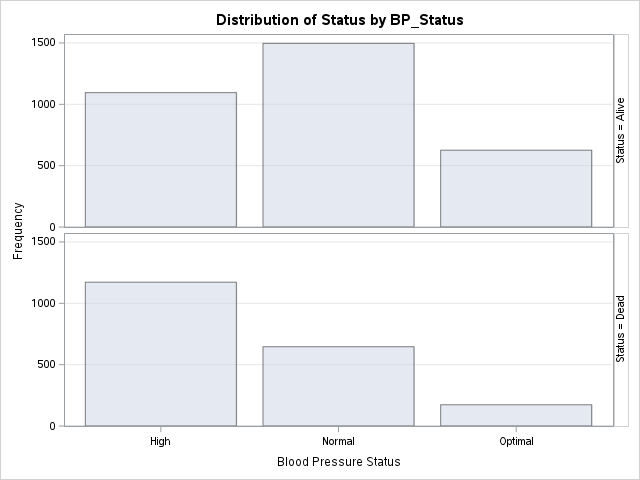
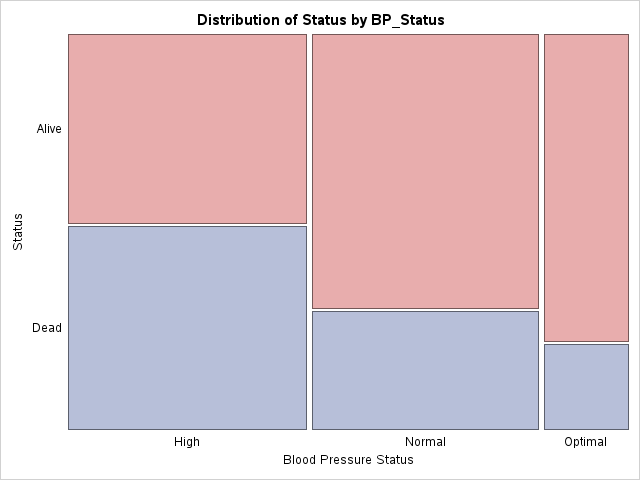
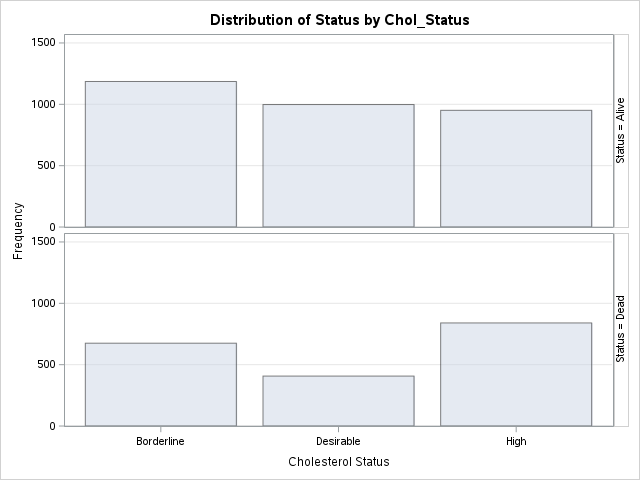
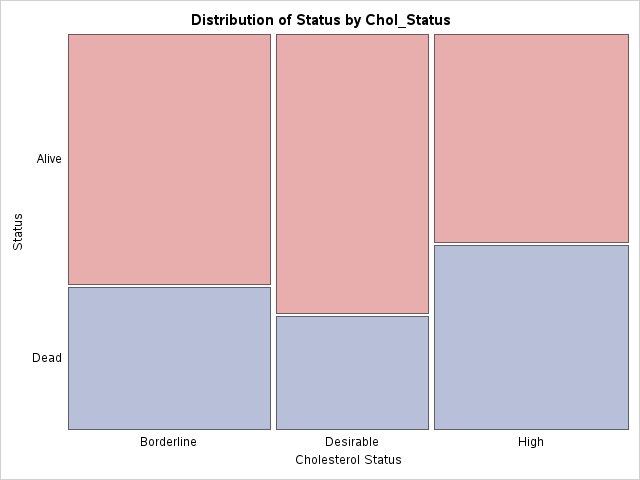
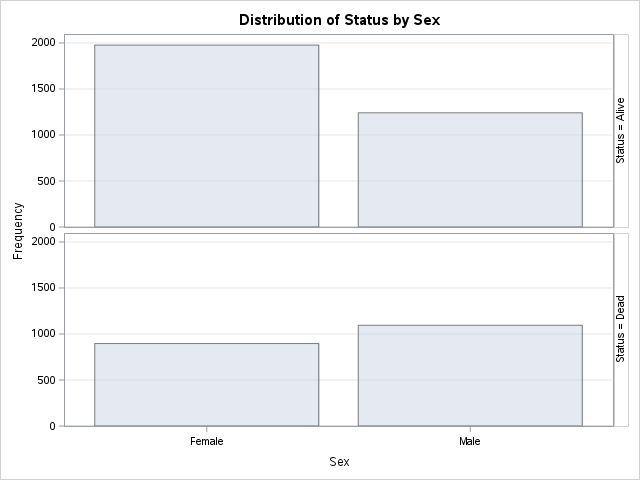
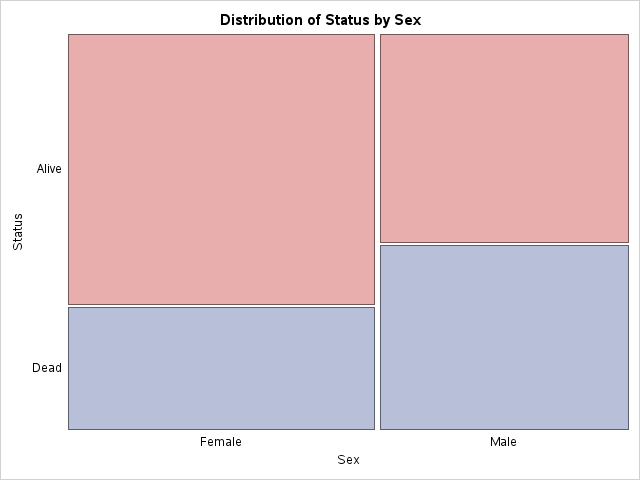
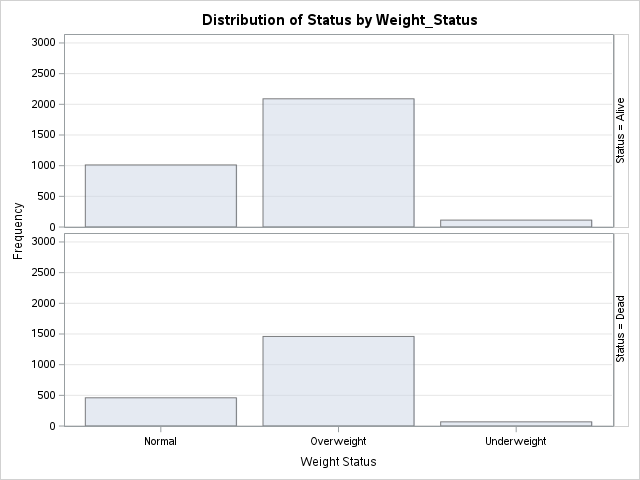
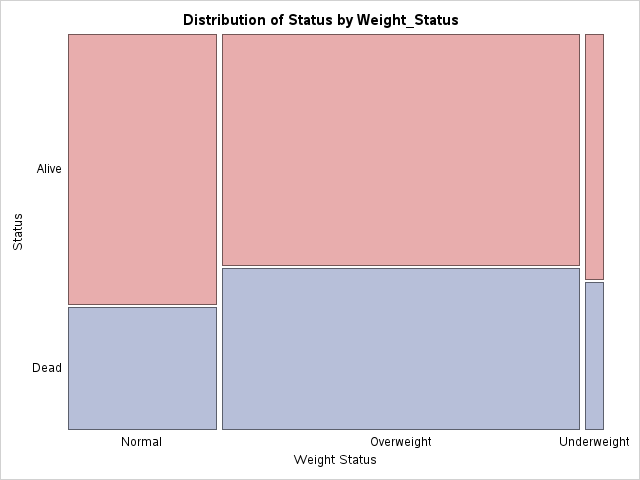

In [3]:
proc freq data=sashelp.heart;
   table status*(BP_status Chol_status sex Weight_status) / plots=all chisq;
run;


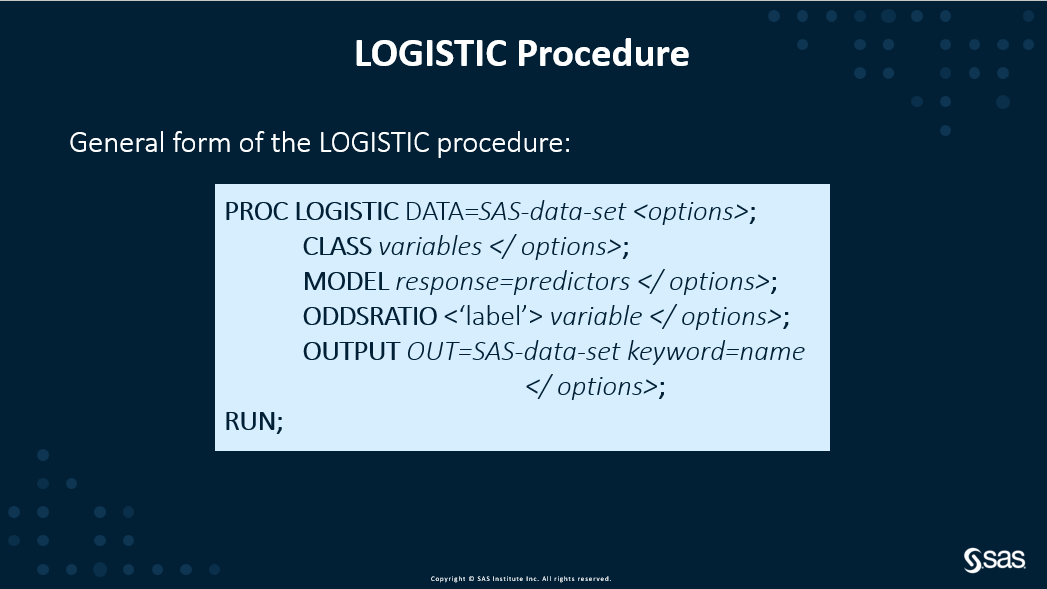

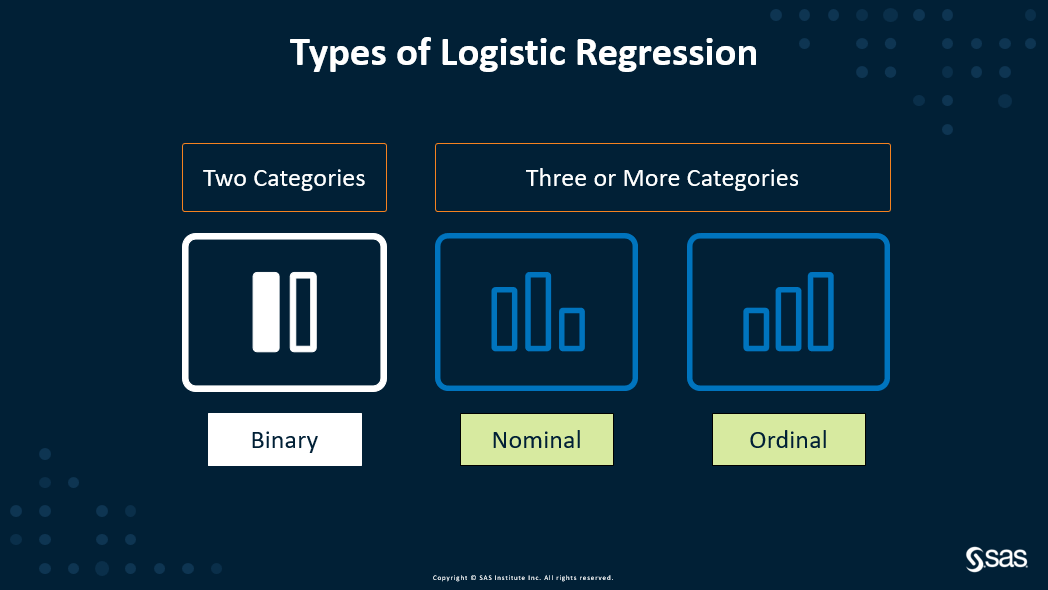

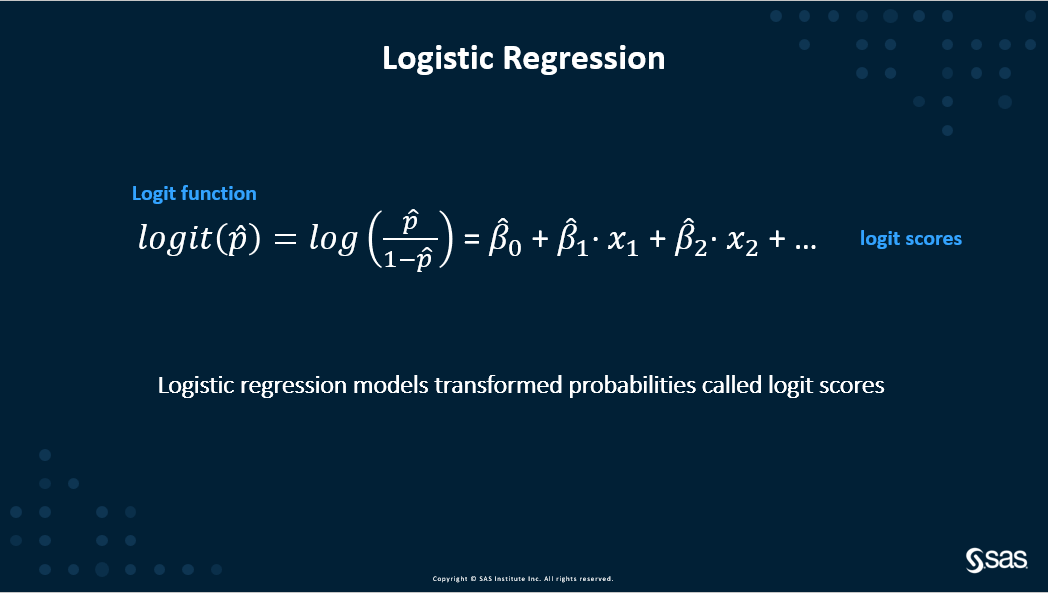

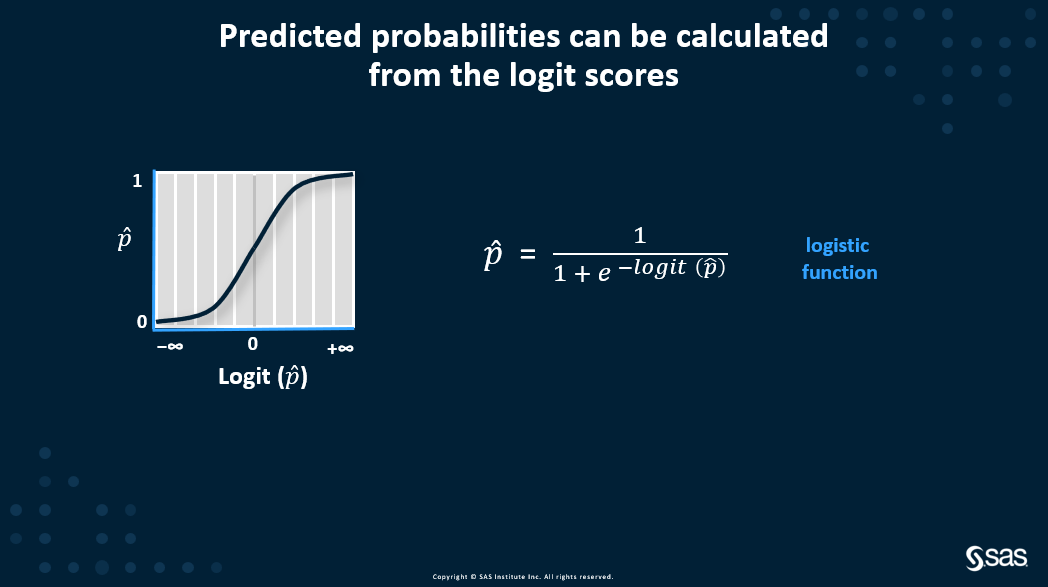

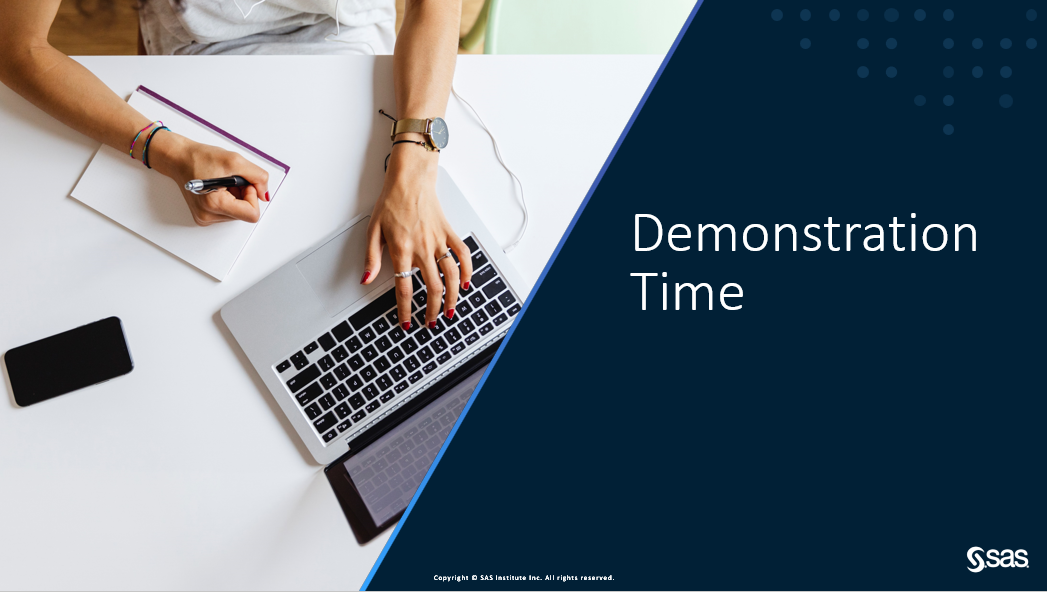

Using PROC LOGISTIC to Model a Categorical Response


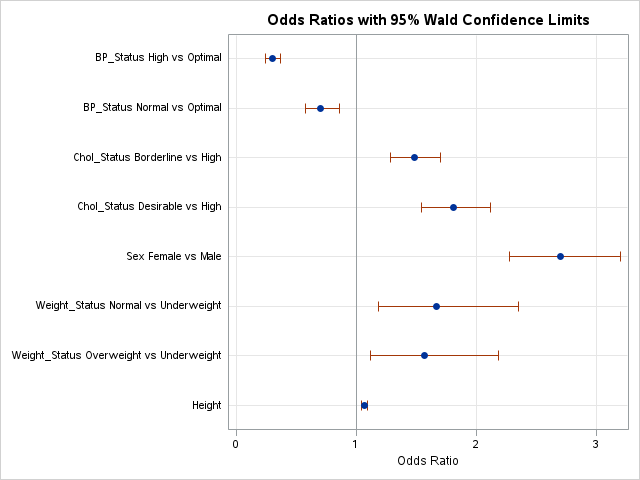
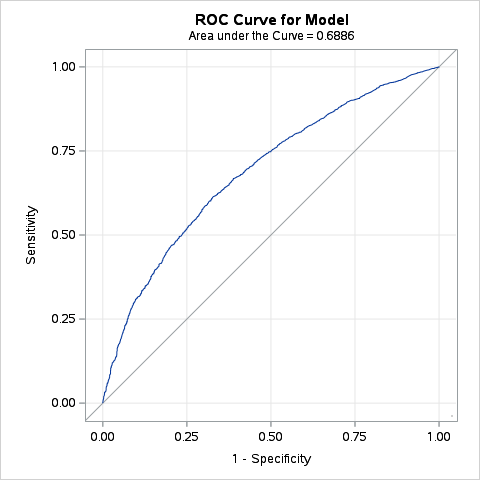
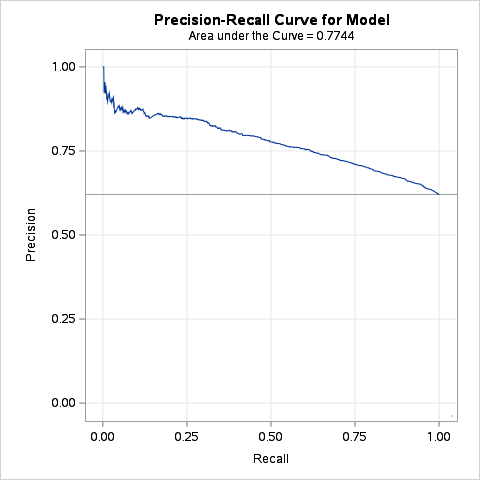
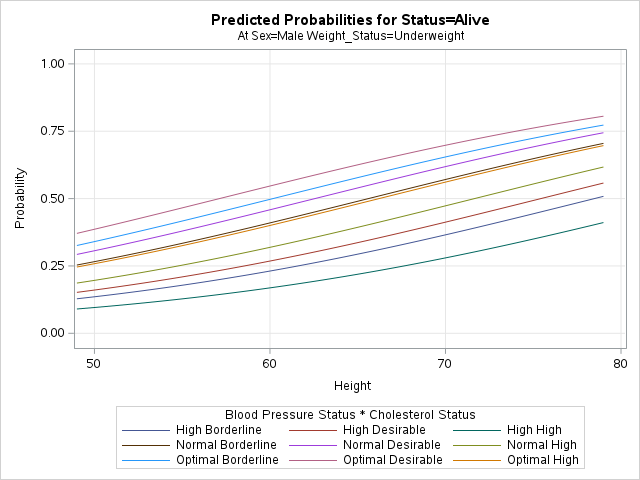

In [4]:
proc logistic data=sashelp.heart plots=all;
   class BP_status Chol_status sex Weight_status;
   model status(event='Alive') = BP_status Chol_status sex Weight_status height;
run;quit;


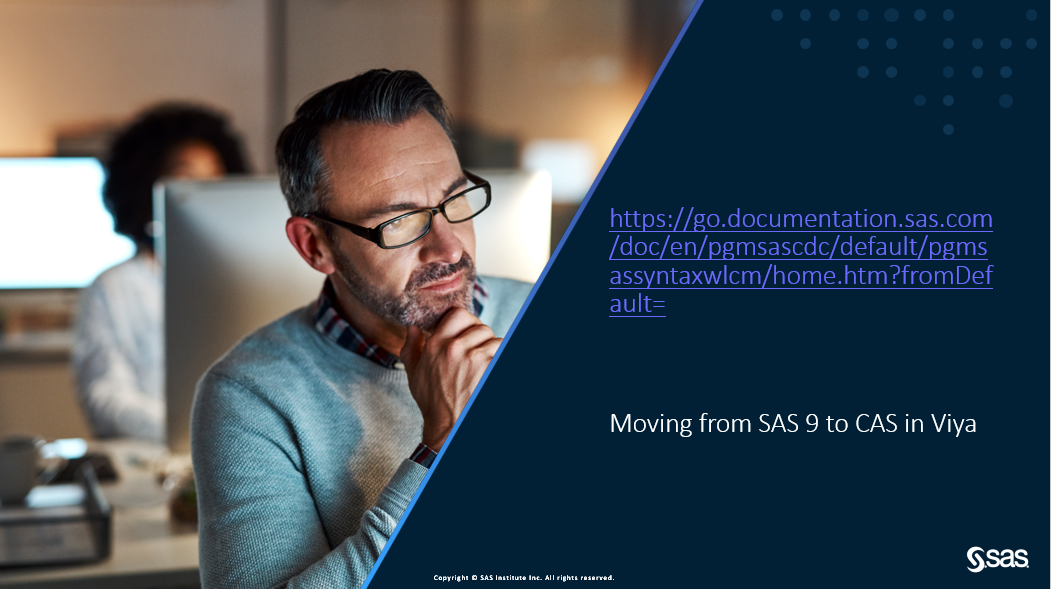

https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsassyntaxwlcm/home.htm?fromDefault=

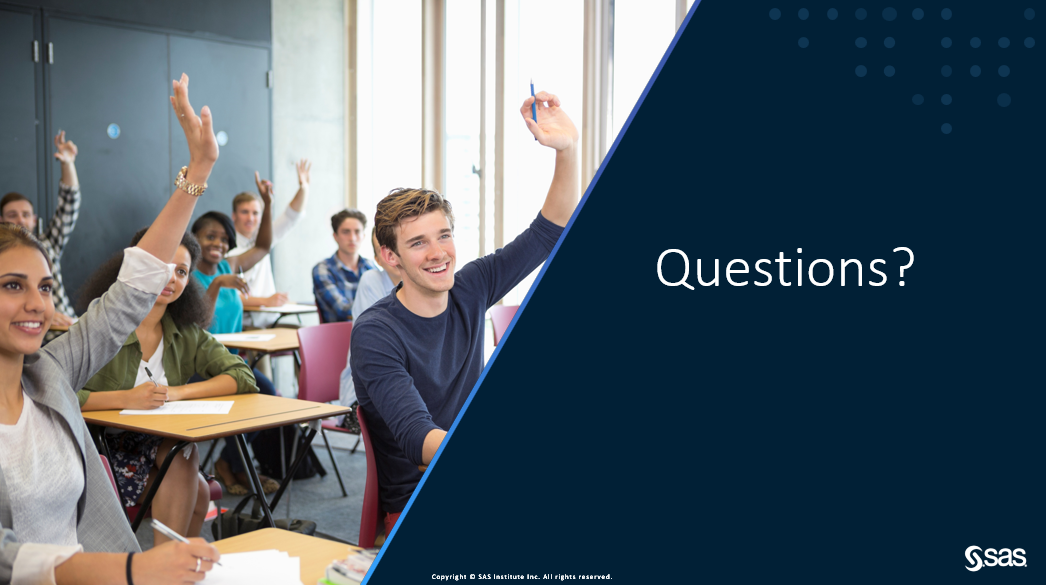